In [58]:
from StabilizerCodesGottesman import *
import numpy as np
import sympy as sp
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister,ClassicalRegister
from qiskit.quantum_info import Statevector, Operator, partial_trace
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.special import erfc

In [ ]:
steane_generators  = [ ( '1111000' , '0000000'), ('1100110', '0000000'), ('1010101','0000000'), ('0000000','1111000'), ('0000000','1100110'), ('0000000','1010101')]
qHamming_generators  = [  ( '0 0 0 0 0 0 0 1 1 1 1 1 1 1 1'.replace(" ", ""),'0'*15), ('0 0 0 1 1 1 1 0 0 0 0 1 1 1 1'.replace(' ',''),'0'*15), ('0 1 1 0 0 1 1 0 0 1 1 0 0 1 1'.replace(' ',''),'0'*15), ('1 0 1 0 1 0 1 0 1 0 1 0 1 0 1'.replace(' ',''),'0'*15), ( '0'*15,'0 0 0 0 0 0 0 1 1 1 1 1 1 1 1'.replace(" ", "")), ('0'*15, '0 0 0 1 1 1 1 0 0 0 0 1 1 1 1'.replace(' ','')), ('0'*15,'0 1 1 0 0 1 1 0 0 1 1 0 0 1 1'.replace(' ','')), ('0'*15,'1 0 1 0 1 0 1 0 1 0 1 0 1 0 1'.replace(' ',''))]
SteaneMerge_generators  = [('110011000000' , '0'*12), 
                           ('000011001100', '0'*12), 
                           ('011001100110', '0'*12),
                           ('001100110000', '0'*12),
                           ('000000110011', '0'*12),
                           ('0'*12,'110011000000'), ('0'*12,'000011001100'), ('0'*12, '011001100110'),
                           ('0'*12, '001100110000'), ('0'*12,'000000110011')]


In [60]:
def execute_model(code_generators, n, k ,  p_error, num_shots, success=True):
    success_rate = 0
    
    for i in range(num_shots):
        code_circuit = CSS_code(code_generators,n,k,p_error)
        job = AerSimulator().run(code_circuit, shots=1, memory=True)
        result = job.result()
        memory = result.get_memory(code_circuit)
        if int( memory[0].replace(' ',''),2) == 0:
            success_rate += 1

    if success == True:      
        return  success_rate/num_shots
    
    if success == False:
        return 1 - (success_rate/num_shots) 


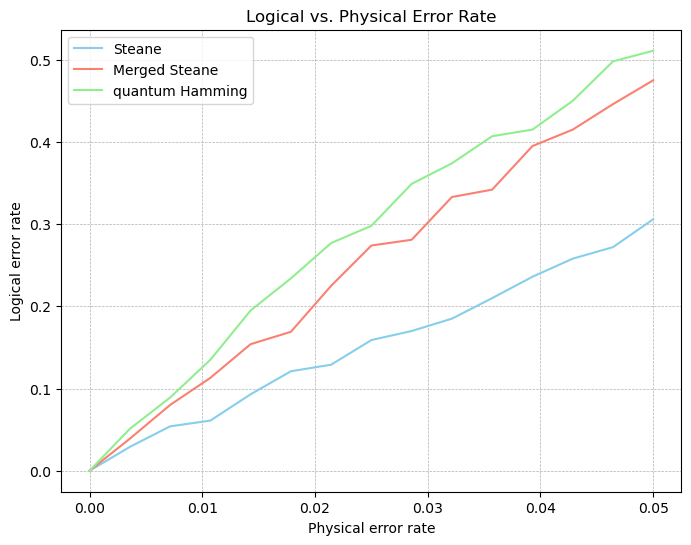

In [ ]:
error_rates = np.linspace(0, 0.05, 15)

Steane_logical_error_rates = [execute_model(steane_generators,7,1,p,1000, success=False ) for p in error_rates]
MergedSteane_error_rates = [ execute_model(SteaneMerge_generators, 12, 2, p,1000, success=False ) for p in error_rates]
qHamm_logical_error_rates = [execute_model(qHamming_generators,15,7, p,1000,success=False )for p in error_rates]


plt.figure(figsize=(8, 6))
plt.plot(error_rates, Steane_logical_error_rates,  color='skyblue', label='Steane')
plt.plot(error_rates, MergedSteane_error_rates, color='salmon', label='Merged Steane')
plt.plot(error_rates, qHamm_logical_error_rates, color='lightgreen', label='quantum Hamming')



plt.title('Logical vs. Physical Error Rate')
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()